In [19]:
%pip install statsmodels

^C
Note: you may need to restart the kernel to use updated packages.


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.0/9.8 MB 2.8 MB/s eta 0:00:04
   ------ --------------------------------- 1.6/9.8 MB 2.8 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.8 MB 2.7 MB/s eta 0:00:03
   ---------- ----------------------------- 2.6/9.8 MB 2.6 MB/s eta 0:00:03
   ------------ --------------------------- 3.1/9.8 MB 2.7 MB/s eta 0:00:03
   -------------- ------------------------- 3.7/9.8 MB 2.7 MB/s eta 0:00:03
   ----------------- ---------------------- 4.2/9.8 MB 2.6 MB/s eta 0:00:03
   ------------------- -------------------- 4.7/9.8 MB 2.6 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.8 MB 2.6 MB/s eta 0:00:02
   ----------------------- ---------------- 5.8/9.8 MB 2.6 MB/s eta 0:00:02
   ------------------------- -------------- 6.3/9.8 MB 2.6 MB/s eta 0:00:02
   ----------------

In [12]:
import pandas as pd
from binance.client import Client
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression



In [9]:
def get_data(api_key = 'your_api_key', api_secret = 'your_api_secret', symbol = 'BTCUSDT', interval = '1d', start_date = '1 Jan, 2010', end_date = '28 Feb, 2025'):
    client = Client(api_key, api_secret)
    klines = client.get_historical_klines(symbol, interval, start_date, end_date)
    df = pd.DataFrame(klines, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    for col in df.columns:
        df[col] = pd.to_numeric(df[col])
    return df[['open', 'close', 'volume']]

btc = get_data()
for col in btc.columns:
    btc[col] = pd.to_numeric(btc[col])
btc.head()

,open,close,volume
timestamp,,,
2017-08-17,4261.48,4285.08,795.150377
2017-08-18,4285.08,4108.37,1199.888264
2017-08-19,4108.37,4139.98,381.309763
2017-08-20,4120.98,4086.29,467.083022
2017-08-21,4069.13,4016.00,691.743060


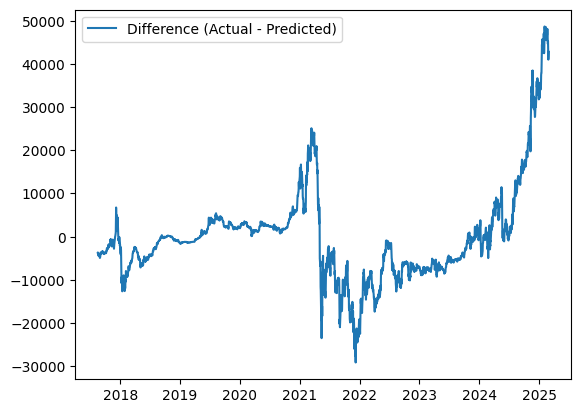

In [17]:
eth = get_data(symbol = 'ETHUSDT')
eth.head()

stat_arb_data = pd.merge(btc['close'], eth['close'], left_index=True, right_index=True, suffixes=('_btc', '_eth'))
# Perform linear regression
model = LinearRegression()
model.fit(stat_arb_data[['close_eth']], stat_arb_data['close_btc'])

pred_btc = model.predict(stat_arb_data[['close_eth']])

# Plot the difference between actual BTC close prices and predicted BTC close prices
plt.plot(stat_arb_data.index, stat_arb_data['close_btc'] - pred_btc, label='Difference (Actual - Predicted)')
plt.legend()
plt.show()

In [ ]:


from statsmodels.tsa.stattools import adfuller

# Calculate the difference between actual BTC close prices and predicted BTC close prices
diff = stat_arb_data['close_btc'] - pred_btc

# Perform ADF test
result = adfuller(diff)

# Print the result
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))

ModuleNotFoundError: No module named 'statsmodels'